We will be creating a synthetic dataset using the following criteria:

• There are 800 samples.
• Each sample from the dataset has five features called ID, Group, Feature_1, Feature_2
and Feature_3.
• The ID feature is a unique identifier for each sample. The identifier has the form IDxxx
where x is a three digit number.
• The Group feature is either A, B, or C. Roughly a third of each sample lies in each group.
• Feature_1 is sampled randomly from a normal distribution with mean 2500. About 66%
of the data falls between 2200 and 2800.
• Feature_2 is sampled randomly from a normal distribution with mean 400 and standard
deviation 15.
• Feature_3 depends on the Group feature. For A, Feature_3 is approximately
3(Feature_1)-5(Feature_2). For B, Feature_3 is approximately 2(Feature_1). For
C, Feature_3 is approximately -(Feature_1)+(Feature_2). In each of cases A, B, and
C the difference between Feature_3 and the value given by the formula is a normally
distributed random variable with mean 0 and standard deviation 12.

In [49]:
#Lets start by importing some packages
import pandas as pd
import numpy as np

#Create a dataframe with 800 rows and 5 columns
df = pd.DataFrame(np.random.randint(0,1,size=(800, 5)), columns = ['ID', 'Group', 'Feature_1', 'Feature_2', 'Feature_3'])

In [50]:
#For the ID column, we want to make sure that each ID is unique, and each of the features and group are occupied accordingly
i = 0
while i < len(df['ID']):
    
    num = str(i).zfill(3)
    string = 'ID' + num
    df['ID'][i] = string

    rand = np.random.randint(1, 4)
    if rand == 1:
        df['Group'][i] = 'A'
    elif rand == 2:
        df['Group'][i] = 'B'    
    elif rand == 3:
        df['Group'][i] = 'C'
        
    df['Feature_1'][i] = np.random.normal(2500, 300)
    df['Feature_2'][i] = np.random.normal(400, 15)

    if df['Group'][i] == 'A':
        df['Feature_3'][i] = (3*df['Feature_1'][i]) - (5*df['Feature_2'][i]) + np.random.normal(0, 12)
    elif df['Group'][i] == 'B':
        df['Feature_3'][i] = (2*df['Feature_1'][i]) + np.random.normal(0, 12)
    elif df['Group'][i] == 'C':
        df['Feature_3'][i] = -df['Feature_1'][i] + df['Feature_2'][i] + np.random.normal(0, 12)

    i += 1

/var/folders/bw/hngtf3pd7_dgqdd8vzp0s5s00000gn/T/ipykernel_14104/3619536429.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Group'][i] = 'B'
/var/folders/bw/hngtf3pd7_dgqdd8vzp0s5s00000gn/T/ipykernel_14104/3619536429.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Feature_1'][i] = np.random.normal(2500, 300)
/var/folders/bw/hngtf3pd7_dgqdd8vzp0s5s00000gn/T/ipykernel_14104/3619536429.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [34]:
print(df)

        ID Group    Feature_1   Feature_2    Feature_3
0    ID000     C  2606.785919  408.686551 -2196.669396
1    ID001     B  2528.716950  398.269921  5053.235916
2    ID002     A  2377.071526  412.641061  5076.551141
3    ID003     B  2311.434192  422.997454  4618.758412
4    ID004     A  2278.414654  389.049739  4893.938129
..     ...   ...          ...         ...          ...
795  ID795     A  3082.386781  411.245580  7199.283378
796  ID796     B  2478.595631  383.443484  4953.951101
797  ID797     A  2913.485300  412.318435  6677.026184
798  ID798     B  2880.512024  380.082700  5768.045514
799  ID799     C  2818.995184  403.996767 -2428.949714

[800 rows x 5 columns]


In [51]:
#Based on the theoretical distribution of Feature_1, how many samples do you expect to find where the value of the feature is greater than 3000?
import scipy
print("You would expect that " + str(((1-scipy.stats.norm.cdf(3000, loc=2500, scale=300))*800).round(0)) + " values would be greater than 3000")

You would expect that 38.0 values would be greater than 3000


In [52]:
#How many samples did you actually find where Feature_1 is greater than 3000?
i = 0 
count = 0
while i < len(df['ID']):
    if df['Feature_1'][i] > 3000:
        count += 1
    i += 1

print("There are " + str(count) + " values greater than 3000")

There are 41 values greater than 3000


In [53]:
#Group the dataset by the Group field and compute the mean and standard deviation of Feature_3 within each group.
print(df.groupby('Group').Feature_3.mean())
print(df.groupby('Group').Feature_3.std())

Group
A    5500.451591
B    4944.824299
C   -2086.847633
Name: Feature_3, dtype: float64
Group
A    923.627258
B    570.156715
C    303.417666
Name: Feature_3, dtype: float64


Text(0.5, 1.0, 'Feature_3 vs Feature_1')

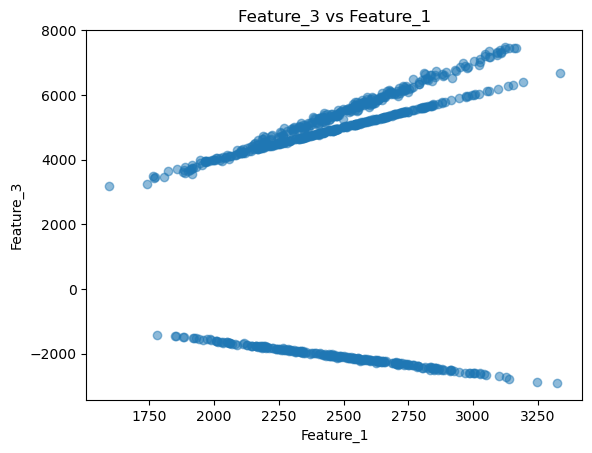

In [56]:
#Make a scatterplot of Feature_3 vs Feature_1.
import matplotlib.pyplot as plt
plt.scatter(df['Feature_1'], df['Feature_3'])
plt.xlabel('Feature_1')
plt.ylabel('Feature_3')
plt.title('Feature_3 vs Feature_1')